#### We can test the power of our newly created algorithm by running it on a simple regression problem and comparing our results against those gotten from a linear regression model.

In [1]:
#importing the NN class from the neural model and also other modules like sklearn
from neural import NN
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics

We will be making use of the diabetes dataset present in sklearn.

In [2]:
#Loading dataset
diabetes= datasets.load_diabetes()
X = diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [3]:
X.shape

(442, 10)

In [4]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
y.shape

(442,)

Trying out the NN algorithm first. The class has two prominent methods; one that returns the weights, bias and mean_squared_error after each epoch of the gradient descent step and another method that plots the mean_squared_error against every iterative step specified as an argument. 

In [20]:
#Instantiating the NN class 
model_nn=NN(X,y)
#Using 300 iterations with a learn_rate of 0.01
weights,bias,mean_squared_error=model_nn.fit(300,0.01)
print(f'The weights are {weights}')
print()
print(f'The bias is {bias}')
print()
for i in range(len(mean_squared_error)):
    print(f'The mean squared error for {i} iteration is {mean_squared_error[i]}')


The weights are [-1.32938667 -4.29766141  5.16686939  1.40856394 -6.61298378 -5.98315898
 -3.26871676  0.01606777  2.92964555 -1.83937239]

The bias is [678.75364619]

The mean squared error for 0 iteration is 29031.072333137996
The mean squared error for 1 iteration is 29026.2107700062
The mean squared error for 2 iteration is 28897.37724112519
The mean squared error for 3 iteration is 28769.176846908682
The mean squared error for 4 iteration is 28641.79938459401
The mean squared error for 5 iteration is 28515.228163429845
The mean squared error for 6 iteration is 28389.50736678704
The mean squared error for 7 iteration is 28264.63505562143
The mean squared error for 8 iteration is 28140.607263895665
The mean squared error for 9 iteration is 28017.407818498075
The mean squared error for 10 iteration is 27895.04255783186
The mean squared error for 11 iteration is 27773.50900038782
The mean squared error for 12 iteration is 27652.80289898949
The mean squared error for 13 iteration is 27

Our results show a drop in mean_squared_error with every new iterative step taken. To further explore this, we will visualize using the `plot_mse` method that takes in number of iterations and learn rate as arguments.

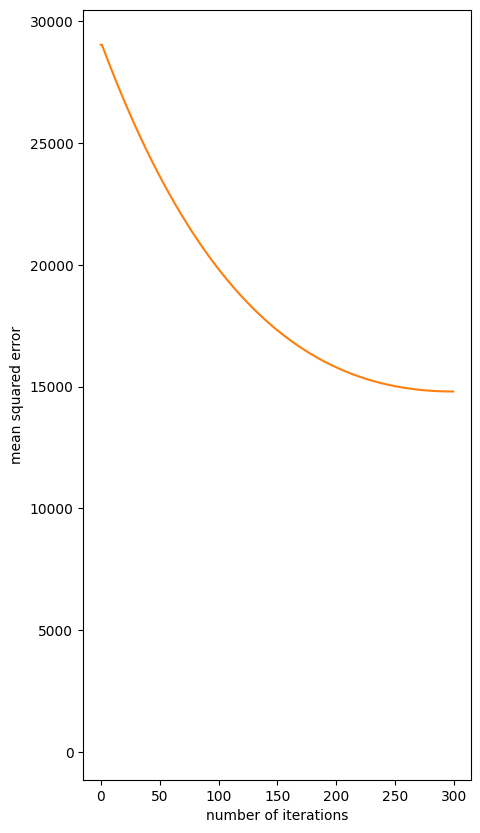

In [19]:
model_nn.plot_mse(300,0.01)

From our plot, there is an obvious drop in mean squared error with the value settling at about 14798 which is the global minima.



Next, we will try the linear regression class from sklearn

In [8]:
#Instantiating the class and fitting the model
model_lr=LinearRegression()
model_lr.fit(X,y)
y_pred=model_lr.predict(X)


In [9]:
print(metrics.mean_squared_error(y,y_pred))

2859.69634758675
